In [3]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [5]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
efficientnet = hub.KerasLayer(efficientnet_url, input_shape=(224, 224, 3))

In [8]:
num_classes = 2

model_1 = tf.keras.Sequential([
    efficientnet,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [10]:
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
import tensorflow as tf

# Data directories
train_dir = "C:/Dataset_Compare/cropweed1/train"
test_dir = "C:/Dataset_Compare/cropweed1/test"

# Image size
img_size = (224, 224)

# Batch size
batch_size = 32
epochs = 10

# Rescale images and apply data augmentation to the training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0,     # Rescale pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images within the range of [-20, 20] degrees
    width_shift_range=0.2,   # Randomly shift the width of images by a maximum of 20% of the total width
    height_shift_range=0.2,  # Randomly shift the height of images by a maximum of 20% of the total height
    horizontal_flip=True,    # Randomly flip images horizontally
    zoom_range=0.2           # Randomly zoom into images by a maximum of 20%
)

# Rescale images for the validation/test data (no data augmentation)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators for the train and test datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 265 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [15]:
history_1 = model_1.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/10
9/9 [==============================] - 325s 37s/step - loss: 0.2472 - accuracy: 0.8943 - val_loss: 0.1720 - val_accuracy: 0.9634
Epoch 2/10
9/9 [==============================] - 338s 38s/step - loss: 0.0674 - accuracy: 0.9774 - val_loss: 0.1114 - val_accuracy: 0.9634
Epoch 3/10
9/9 [==============================] - 347s 39s/step - loss: 0.0415 - accuracy: 0.9849 - val_loss: 0.0842 - val_accuracy: 0.9756
Epoch 4/10
9/9 [==============================] - 364s 44s/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.1345 - val_accuracy: 0.9634
Epoch 5/10
9/9 [==============================] - 352s 40s/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0996 - val_accuracy: 0.9634
Epoch 6/10
9/9 [==============================] - 352s 40s/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9756
Epoch 7/10
9/9 [==============================] - 327s 37s/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9756
Epoch 8/10
9/9 [====

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 4,378,014
Trainable params: 328,450
Non-trainable params: 4,049,564
_________________________________________________________________


In [17]:
#Plotting our loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="Validation_loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.ylabel("Losses")
  plt.legend()

  #Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="Validation_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()


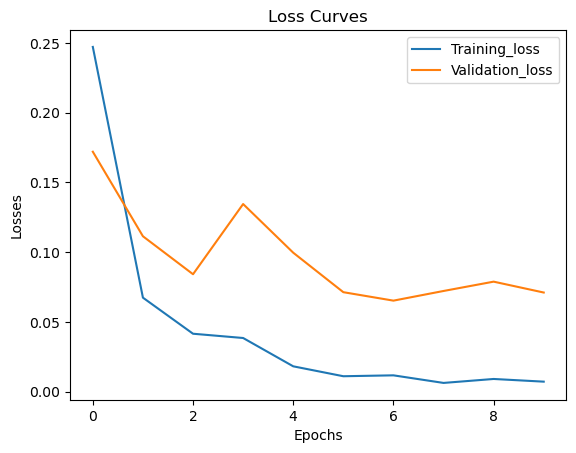

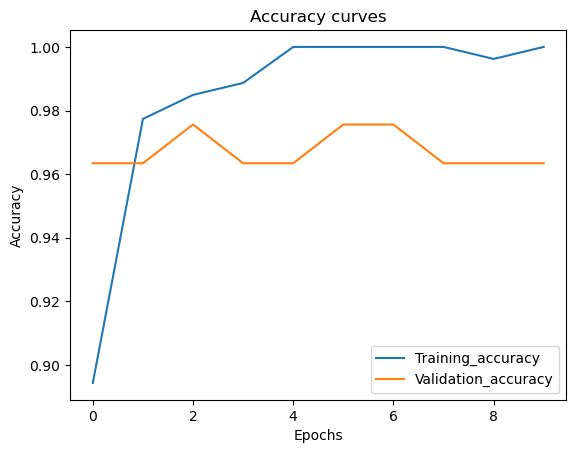

In [19]:
plot_loss_curves(history_1)

In [20]:
num_classes = 2

model_2 = tf.keras.Sequential([
    efficientnet,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [21]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
import tensorflow as tf

# Data directories
train_dir = "C:/Dataset_Compare/cropweed2/train"
test_dir = "C:/Dataset_Compare/cropweed2/test"

# Image size
img_size = (224, 224)

# Batch size
batch_size = 32
epochs = 10

# Rescale images and apply data augmentation to the training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0,     # Rescale pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images within the range of [-20, 20] degrees
    width_shift_range=0.2,   # Randomly shift the width of images by a maximum of 20% of the total width
    height_shift_range=0.2,  # Randomly shift the height of images by a maximum of 20% of the total height
    horizontal_flip=True,    # Randomly flip images horizontally
    zoom_range=0.2           # Randomly zoom into images by a maximum of 20%
)

# Rescale images for the validation/test data (no data augmentation)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators for the train and test datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 320 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [23]:
history_2 = model_2.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/10
10/10 [==============================] - 123s 12s/step - loss: 0.2870 - accuracy: 0.8531 - val_loss: 0.2584 - val_accuracy: 0.8659
Epoch 2/10
10/10 [==============================] - 107s 11s/step - loss: 0.1291 - accuracy: 0.9531 - val_loss: 0.1953 - val_accuracy: 0.9512
Epoch 3/10
10/10 [==============================] - 104s 11s/step - loss: 0.0510 - accuracy: 0.9812 - val_loss: 0.2173 - val_accuracy: 0.9512
Epoch 4/10
10/10 [==============================] - 102s 10s/step - loss: 0.0529 - accuracy: 0.9875 - val_loss: 0.2420 - val_accuracy: 0.9512
Epoch 5/10
10/10 [==============================] - 101s 10s/step - loss: 0.0529 - accuracy: 0.9812 - val_loss: 0.2500 - val_accuracy: 0.9390
Epoch 6/10
10/10 [==============================] - 98s 10s/step - loss: 0.0225 - accuracy: 0.9937 - val_loss: 0.2380 - val_accuracy: 0.9634
Epoch 7/10
10/10 [==============================] - 92s 9s/step - loss: 0.0323 - accuracy: 0.9906 - val_loss: 0.2301 - val_accuracy: 0.9634
Epoch 8/1

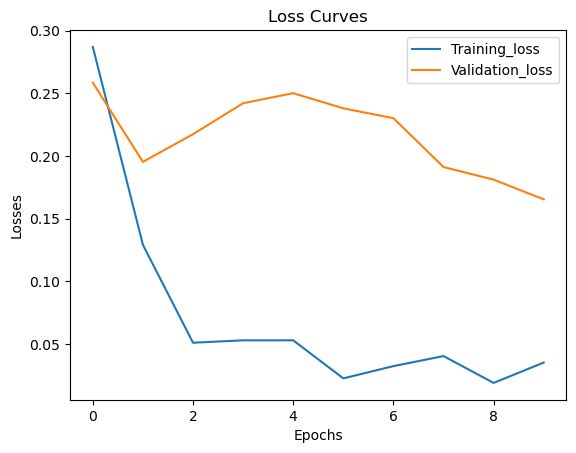

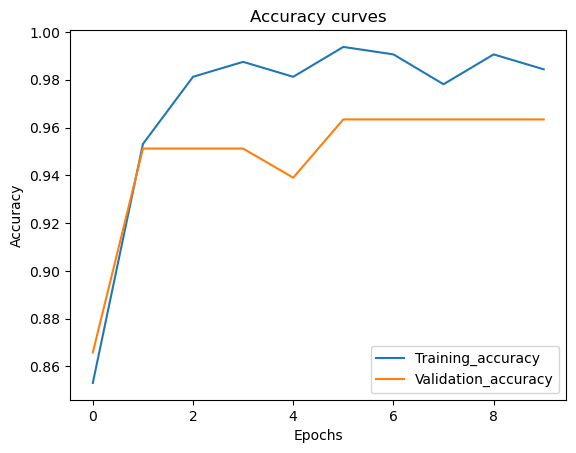

In [25]:
plot_loss_curves(history_2)